# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


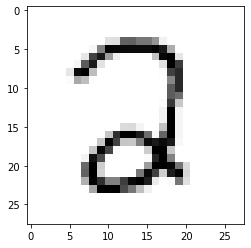

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2233
Training Accuracy: 0.7937, Testing Accuracy: 0.8034



Epoch 10, Loss 0.0546
Training Accuracy: 0.9464, Testing Accuracy: 0.9506



Epoch 20, Loss 0.0392
Training Accuracy: 0.9579, Testing Accuracy: 0.9647



Epoch 30, Loss 0.0333
Training Accuracy: 0.9634, Testing Accuracy: 0.9688



Epoch 40, Loss 0.0299
Training Accuracy: 0.9666, Testing Accuracy: 0.9693



Epoch 50, Loss 0.0275
Training Accuracy: 0.9692, Testing Accuracy: 0.9708



Epoch 60, Loss 0.0257
Training Accuracy: 0.9713, Testing Accuracy: 0.9703



Epoch 70, Loss 0.0243
Training Accuracy: 0.9729, Testing Accuracy: 0.9718



Epoch 80, Loss 0.023
Training Accuracy: 0.9742, Testing Accuracy: 0.9733



Epoch 90, Loss 0.022
Training Accuracy: 0.9756, Testing Accuracy: 0.9738



Epoch 100, Loss 0.021
Training Accuracy: 0.9765, Testing Accuracy: 0.9753



Epoch 110, Loss 0.0202
Training Accuracy: 0.9772, Testing Accuracy: 0.9763



Epoch 120, Loss 0.0194
Training Accuracy: 0.9778, Testing Accuracy: 0.9758



Epoch 130, Loss 0.0187
Training Accuracy: 0.9789, Testing Accuracy: 0.9758



Epoch 140, Loss 0.0181
Training Accuracy: 0.9799, Testing Accuracy: 0.9758



Epoch 150, Loss 0.0174
Training Accuracy: 0.9804, Testing Accuracy: 0.9758



Epoch 160, Loss 0.0169
Training Accuracy: 0.9817, Testing Accuracy: 0.9773



Epoch 170, Loss 0.0163
Training Accuracy: 0.9823, Testing Accuracy: 0.9778



Epoch 180, Loss 0.0158
Training Accuracy: 0.9826, Testing Accuracy: 0.9783



Epoch 190, Loss 0.0153
Training Accuracy: 0.9833, Testing Accuracy: 0.9788



Epoch 200, Loss 0.0149
Training Accuracy: 0.9836, Testing Accuracy: 0.9788



Epoch 210, Loss 0.0145
Training Accuracy: 0.9844, Testing Accuracy: 0.9793



Epoch 220, Loss 0.0141
Training Accuracy: 0.9848, Testing Accuracy: 0.9803



Epoch 230, Loss 0.0137
Training Accuracy: 0.9855, Testing Accuracy: 0.9803



Epoch 240, Loss 0.0133
Training Accuracy: 0.9859, Testing Accuracy: 0.9798



Epoch 250, Loss 0.0129
Training Accuracy: 0.9866, Testing Accuracy: 0.9798



0.019850986658930314

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2326
Training Accuracy: 0.7185, Testing Accuracy: 0.7475



Epoch 10, Loss 0.1055
Training Accuracy: 0.8988, Testing Accuracy: 0.9133



Epoch 20, Loss 0.0811
Training Accuracy: 0.9224, Testing Accuracy: 0.9345



Epoch 30, Loss 0.0696
Training Accuracy: 0.9327, Testing Accuracy: 0.9471



Epoch 40, Loss 0.0627
Training Accuracy: 0.9385, Testing Accuracy: 0.9521



Epoch 50, Loss 0.058
Training Accuracy: 0.9417, Testing Accuracy: 0.9531



Epoch 60, Loss 0.0545
Training Accuracy: 0.9445, Testing Accuracy: 0.9536



Epoch 70, Loss 0.0519
Training Accuracy: 0.9473, Testing Accuracy: 0.9561



Epoch 80, Loss 0.0497
Training Accuracy: 0.9490, Testing Accuracy: 0.9567



Epoch 90, Loss 0.048
Training Accuracy: 0.9503, Testing Accuracy: 0.9582



Epoch 100, Loss 0.0465
Training Accuracy: 0.9513, Testing Accuracy: 0.9592



Epoch 110, Loss 0.0453
Training Accuracy: 0.9526, Testing Accuracy: 0.9602



Epoch 120, Loss 0.0442
Training Accuracy: 0.9532, Testing Accuracy: 0.9612



Epoch 130, Loss 0.0432
Training Accuracy: 0.9537, Testing Accuracy: 0.9612



Epoch 140, Loss 0.0424
Training Accuracy: 0.9546, Testing Accuracy: 0.9622



Epoch 150, Loss 0.0416
Training Accuracy: 0.9552, Testing Accuracy: 0.9627



Epoch 160, Loss 0.0409
Training Accuracy: 0.9556, Testing Accuracy: 0.9627



Epoch 170, Loss 0.0403
Training Accuracy: 0.9567, Testing Accuracy: 0.9642



Epoch 180, Loss 0.0397
Training Accuracy: 0.9570, Testing Accuracy: 0.9642



Epoch 190, Loss 0.0392
Training Accuracy: 0.9575, Testing Accuracy: 0.9642



Epoch 200, Loss 0.0387
Training Accuracy: 0.9580, Testing Accuracy: 0.9642



Epoch 210, Loss 0.0383
Training Accuracy: 0.9584, Testing Accuracy: 0.9642



Epoch 220, Loss 0.0379
Training Accuracy: 0.9590, Testing Accuracy: 0.9652



Epoch 230, Loss 0.0375
Training Accuracy: 0.9598, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0371
Training Accuracy: 0.9600, Testing Accuracy: 0.9657



Epoch 250, Loss 0.0367
Training Accuracy: 0.9606, Testing Accuracy: 0.9657



0.013040030971274888

### Comparing results of NN and LR

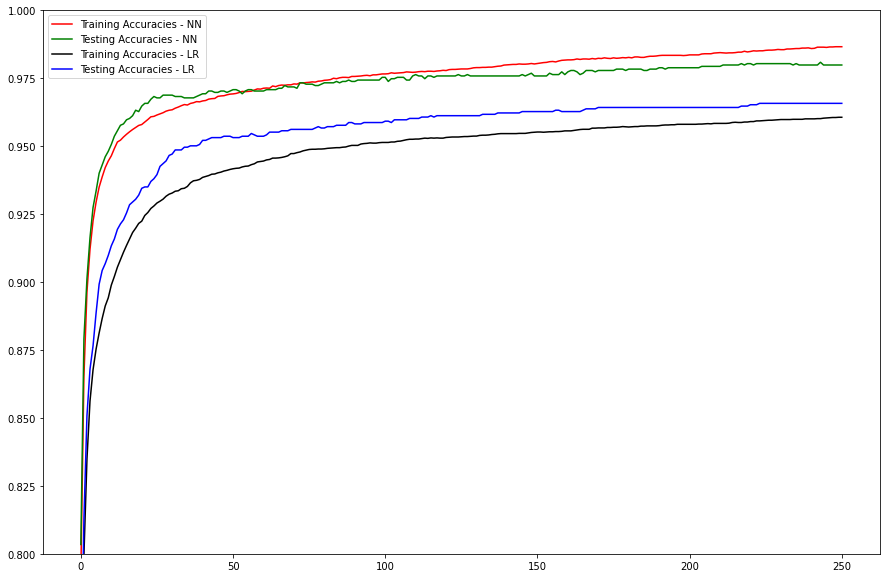

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

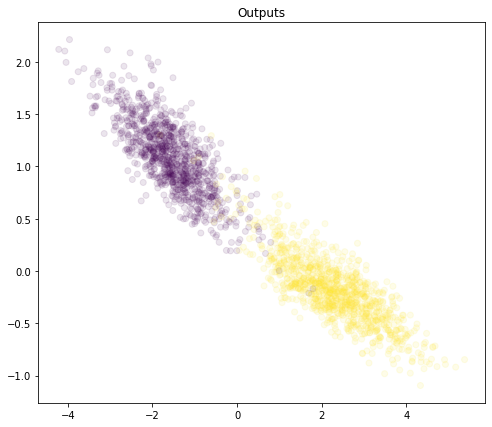

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

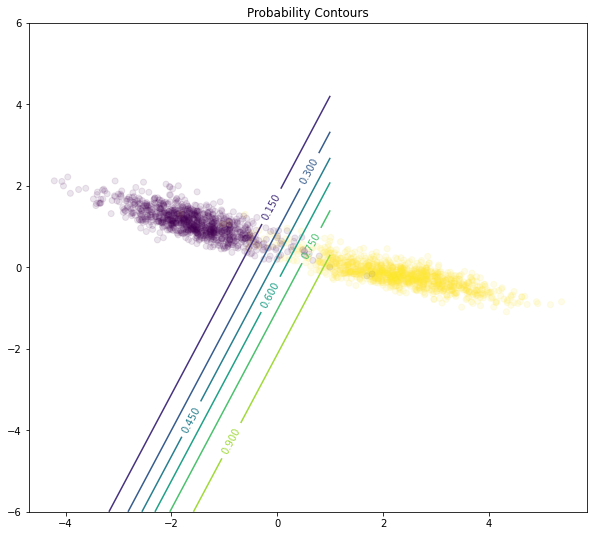

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );